In [5]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow

net = cv2.dnn.readNet("/content/drive/MyDrive/Breachers_ps2/model.weights", "/content/drive/MyDrive/Breachers_ps2/yolov3_testing.cfg")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[0]
 [1]]
[0.8756734728813171, 0.34020692110061646]


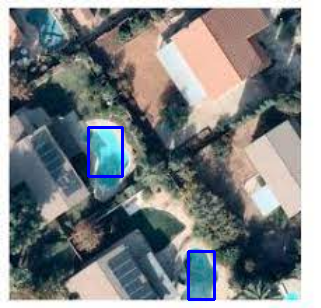

In [8]:
# Name custom object
classes = ["pool"]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes), 3))

img_path = '/content/test3.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, None, fx=1.4, fy=1.4)
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.25:
            # print(class_id)
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.2)

print(indexes)
print(confidences)
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 2)

cv2_imshow(img)